In [ ]:
# importing the packages
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
import sklearn.exceptions
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
from imblearn.under_sampling import NearMiss 
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report,accuracy_score
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

from sklearn import linear_model

## 1. Loading the data

### Acknowledgements
Link to the data set is the kaggle link as follows:

https://www.kaggle.com/kartik2112/fraud-detection

In [2]:
# loading data
data_train = pd.read_csv("fraudTrain.csv")
data_test = pd.read_csv("fraudTest.csv")

## 2. Exploratory Data Analysis

#### 2.1 Data information

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

We see that there are 22 features    
"is_fraud" is the dependent variable 

#### 2.2 Shape of Data


In [4]:
print(data_train.shape,data_test.shape)

(1296675, 23) (555719, 23)


#### 2.3 Taking a fraction to run the model faster


In [5]:
# taking smaller sample to run the model faster

df_train= data_train.sample(frac = 0.1,random_state=1)
df_test= data_test.sample(frac = 0.05,random_state=1)
print(df_train.shape,df_test.shape)

(129668, 23) (27786, 23)


In [6]:
df_train.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
94102,94102,2019-02-25 08:24:40,374497717543058,fraud_Funk Group,grocery_net,20.00,Linda,Hurst,F,31701 Tucker Square Suite 893,...,47.1709,-100.7944,1190,"Designer, ceramics/pottery",1948-06-30,1595dec12f6f19ceaae9b7df0f8af5c0,1330158280,46.398331,-99.813959,0
198791,198791,2019-04-12 19:50:15,4428154703770710,"fraud_Prosacco, Kreiger and Kovacek",home,284.88,Brittany,Guerra,F,79209 Gary Dale,...,46.5901,-117.1692,761,Chief Marketing Officer,1943-06-30,0ed26b649ed0fce94d8e632b7208dea0,1334260215,45.687331,-117.488135,0
1238587,1238587,2020-05-31 21:50:53,213148039875802,"fraud_Langworth, Boehm and Gulgowski",shopping_net,5.07,Jill,Jacobs,F,034 Kimberly Mountains,...,27.9551,-82.2966,79613,Environmental consultant,1978-11-30,7096316ec1a4b261e8613013827abae7,1370037053,27.254081,-81.974799,0


#### 2.4 Checking the null values


In [7]:
df_train.isnull().sum()


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
df_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

We see that no null values are present.

#### 2.5 Correlation Matrix


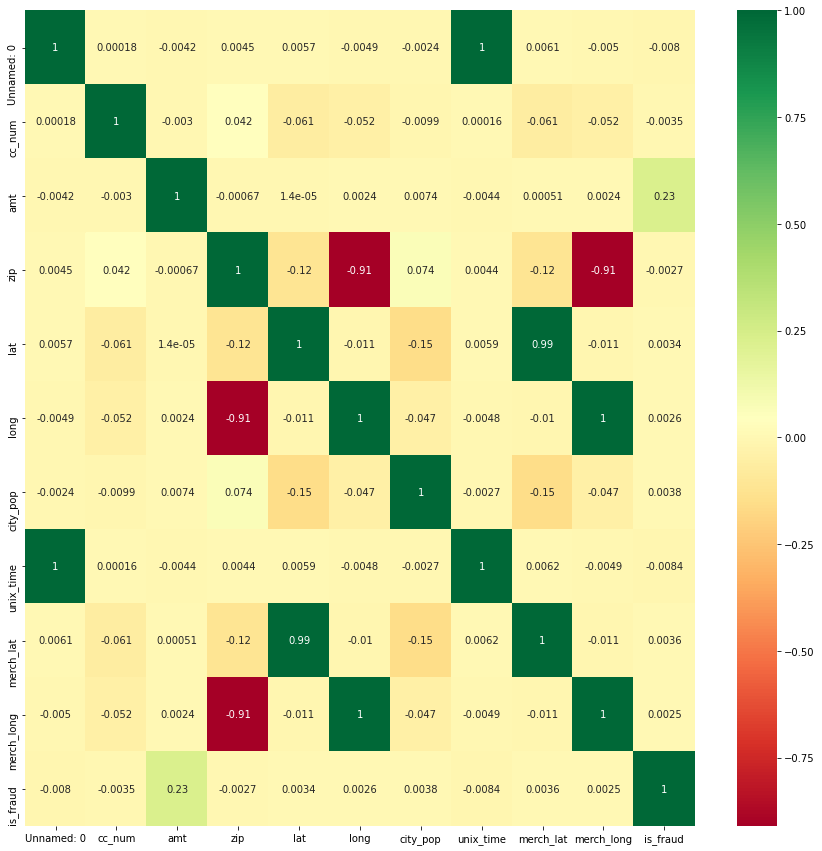

In [9]:
#get correlations of each features in dataset
corrmat = df_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))

#plot heat map
g=sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### 2.6 Histograms

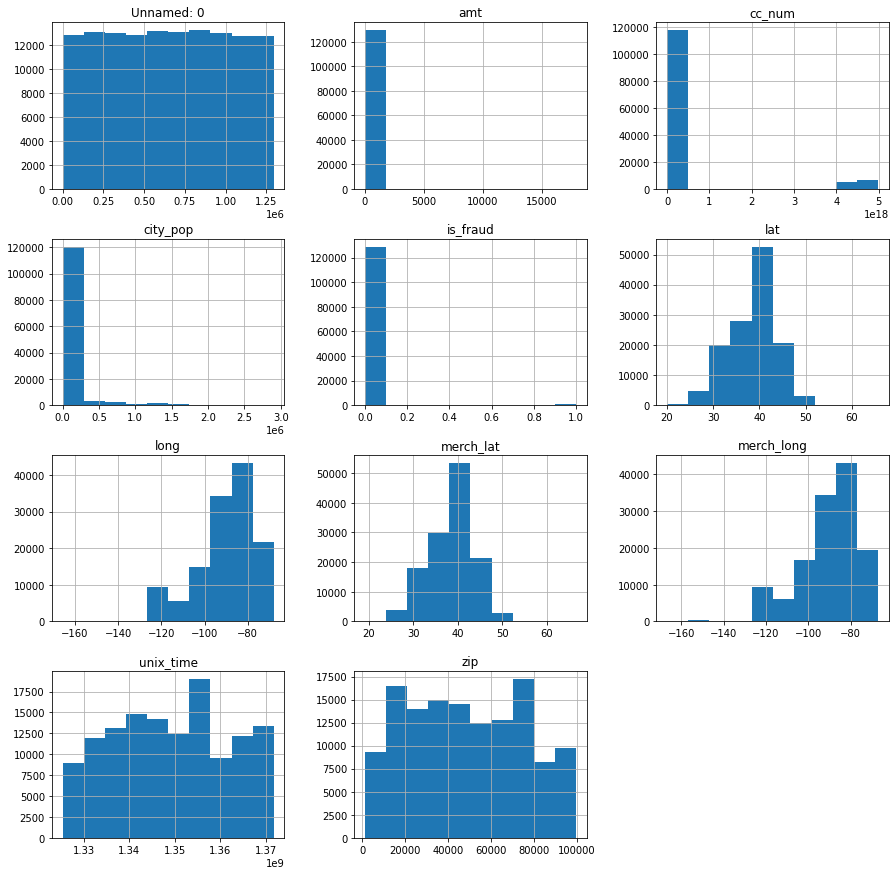

In [10]:
#visual representation of the data using histograms 
df_train.hist(figsize = (15, 15))
plt.show()

#### 2.7 Plotting the classes 

Text(0, 0.5, 'Frequency')

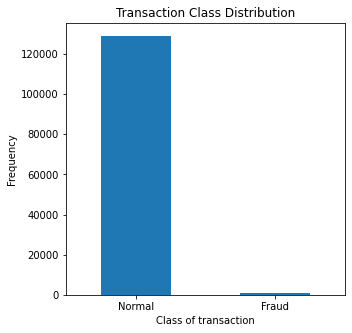

In [11]:
# plotting the classes
plt.figure(figsize=(5,5))
count_classes = pd.value_counts(df_train['is_fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
LABELS = ['Normal','Fraud']
plt.xticks(range(2), LABELS)
plt.xlabel("Class of transaction")
plt.ylabel("Frequency")

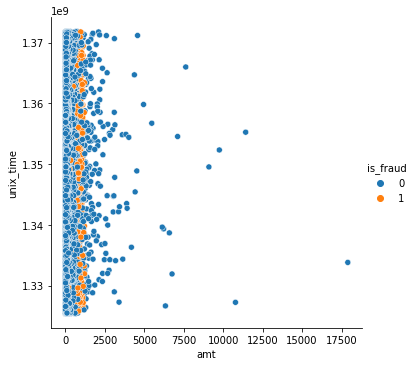

In [229]:
sns.relplot(y = 'unix_time', x = 'amt' , hue = 'is_fraud',data = df_train)

In [231]:
#sns.catplot(y = 'unix_time', x = 'amt' , hue = 'is_fraud',data = df_train)

We see that data is imbalanced    
#### 2.8  Getting the Fraud and the Normal  transaction numbers for test and train dataset


In [12]:
## Get the Fraud and the normal  transaction numbers for test and train dataset 

fraud_train = df_train[df_train['is_fraud']==1]
normal_train = df_train[df_train['is_fraud']==0]
fraud_test = df_test[df_test['is_fraud']==1]
normal_test = df_test[df_test['is_fraud']==0]

print("Normal cases in train set :",len(df_train)-len(fraud_train),"\nFraud cases in train set :",len(fraud_train))
print("Normal cases in test set :",len(df_test)-len(fraud_test),"\nFraud cases in test set :",len(fraud_test))


Normal cases in train set : 128963 
Fraud cases in train set : 705
Normal cases in test set : 27656 
Fraud cases in test set : 130



## 3. Data transformation and feature engineering


From the exploratory data Analysis we make the following observations:   

1. The first column contains just the indices and is not useful so we will drop it.   
2. The third column with customer card number is also not useful , so we will drop it. 
3. "first name" and "last name" can also be dropped.  
4. Transaction number - is it really needed? can be dropped.
5. Date time column can be used to calculate the age of the customer


#### 3.1 Dropping the columns not needed


In [13]:
# function to drop tbe columns
def dropCol(data):
    col_to_drop = ['trans_date_trans_time','Unnamed: 0','cc_num','first','last','trans_num']
    res = data.drop(col_to_drop,axis = 1)
    return res


In [14]:
# dropping the columns
# dropping the columns ['trans_date_trans_time','Unnamed: 0','cc_num','first','last','trans_num']
# train data set
df_train = dropCol(df_train)
# test data set
df_test = dropCol(df_test)

print ( df_train.shape, df_test.shape)

(129668, 17) (27786, 17)


#### 3.2 Dropping the columns not needed


In [15]:
#Create independent and Dependent Features
columns = df_train.columns.tolist()

# removing the dependent feature is_fraud
columns = [c for c in columns if c not in ["is_fraud"]]

X_train = df_train[columns]
Y_train = df_train['is_fraud']
X_test = df_test[columns]
Y_test = df_test['is_fraud']
print ( X_train.shape, Y_train.shape,X_test.shape, Y_test.shape)

(129668, 16) (129668,) (27786, 16) (27786,)


#### 3.3 Converting dob to age


In [16]:
# function to convert dob to years
def age_years(born):
    return 2019 - int(born[0:4])

# replacing the dob column with age column in our data set for test and train
X_train['age'] = X_train['dob'].apply(lambda x: age_years(x))
X_train = X_train.drop(['dob'],axis =1)

X_test['age'] = X_test['dob'].apply(lambda x: age_years(x))
X_test = X_test.drop(['dob'],axis =1)
print(X_train.shape,X_test.shape)


(129668, 16) (27786, 16)


#### 3.4 Converting the categorical features to numerical by one- hot - encoding



In [17]:
# concanating the test and train data so that number of columns remain the same in both the data sets
final_df = pd.concat([X_train,X_test],axis=0)
final_df.shape


(157454, 16)

In [18]:
# creating the list of categorical variables
categorical_features =[feature for feature in X_train.columns if final_df[feature].dtypes == 'O']
categorical_features

['merchant', 'category', 'gender', 'street', 'city', 'state', 'job']

In [19]:
#observing the unique values in each feature
for feature in categorical_features:
    print("Distinct categories for {}  are {}".format(feature,len(final_df[feature].unique())))

Distinct categories for merchant  are 693
Distinct categories for category  are 14
Distinct categories for gender  are 2
Distinct categories for street  are 957
Distinct categories for city  are 872
Distinct categories for state  are 51
Distinct categories for job  are 486


In [20]:
# function to convert categorical variables to one hot encoding
def category_onehot_multcols(data,multcolumns):
    df_final = data
    i=0
    for fields in multcolumns:
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:           
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1             
    df_final=pd.concat([final_df,df_final],axis=1)
    return df_final

In [21]:
# applying the one hot encoding
final_df = category_onehot_multcols(final_df, categorical_features)


merchant
category
gender
street
city
state
job


In [22]:
# removing duplicated columns
final_df =final_df.loc[:,~final_df.columns.duplicated()]
final_df.shape

(157454, 3077)

In [23]:
# separating the test and training data
df_Train=final_df.iloc[:129668,:]
df_Test=final_df.iloc[129668:,:]
print(df_Train.shape,df_Test.shape)

(129668, 3077) (27786, 3077)


In [24]:
print(Y_train.value_counts(),"\n",Y_test.value_counts())

0    128963
1       705
Name: is_fraud, dtype: int64 
 0    27656
1      130
Name: is_fraud, dtype: int64


In [25]:
# files ready for testing on models
print(df_Train.shape, df_Test.shape, Y_train.shape, Y_test.shape)


(129668, 3077) (27786, 3077) (129668,) (27786,)


In [26]:
705/128963

0.005466684242767306

As we see that the data is skewed, i.e the number of samples for class 1 is less tha 0.5% of the samples of class 0.
In this case the the machine learning algorithms with not predict the Fraud cases correctly.
To predict the Fraud correctly we have two approaches:   
1. Handle the imbalance in Data and apply various Machine Learning algorithms and then apply ML models.    
2. Predict Fraud as outlier/Anomaly    
3. Change detection is similar to anomaly detection except rather than looking for an anomaly it is looking for a change or difference. This might be a change in behavior of a user as observed by usage patterns or bank transactions.

We proceed for the first method first.


## 4. Handling the Imbalance in data 

   
Handling the Imbalance in data by one of the following methods:   
> 4.1 Random Under-Sampling   
       4.2 Random Over-Sampling   
       4.3 SMOTE (Synthetic Minority over sampling technique)   
       4.4 Near Miss algorighm ( under sampling )   
       4.5 Ensemble method 
   




First we apply the model without handling the imbalance. We will use Logistic Regression and Decision Tree classifier for our exploration of the method to apply to handle imbalance in data. 

In [27]:
# Logistic Regression
model_LR = LogisticRegression()
model_LR.fit(df_Train,Y_train)
y_pred = model_LR.predict(df_Test)

In [28]:
#Let's evaluate our model 
def print_eval(y_pred,model):
    print("Training Accuracy: ",model.score(df_Train, Y_train))
    print("Testing Accuracy: ", model.score(df_Test, Y_test))
    cm = confusion_matrix(Y_test, y_pred)
    print(cm)
    print(classification_report(Y_test,y_pred))


In [29]:
print_eval(y_pred,model_LR)

Training Accuracy:  0.9945630379122066
Testing Accuracy:  0.9953213848700785
[[27656     0]
 [  130     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27656
           1       0.00      0.00      0.00       130

    accuracy                           1.00     27786
   macro avg       0.50      0.50      0.50     27786
weighted avg       0.99      1.00      0.99     27786



In [30]:
# decision tree
decision_tree_model = DecisionTreeClassifier(random_state=137)
decision_tree_model.fit(df_Train,Y_train)
y_pred = decision_tree_model.predict(df_Test)
print_eval(y_pred,decision_tree_model)

Training Accuracy:  1.0
Testing Accuracy:  0.9866839415533002
[[27333   323]
 [   47    83]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     27656
           1       0.20      0.64      0.31       130

    accuracy                           0.99     27786
   macro avg       0.60      0.81      0.65     27786
weighted avg       0.99      0.99      0.99     27786



#### Metric Analysis

1. **True  Positives** : Correctly classified as Safe Transaction     = 27333 (.99)   
2. **False Negitives** : Mis-classified Safe Transaction              = 323 (Harmless)   
3. **False Positives** : Mis-classified as Fraud Transactions         = 47 (Dangerous )   
4. **True Negatives**  : Correctly classified as Fraud Transactions   = 83 (out of 130 -> .64)   
5. **Accuracy**        : .99   

Here the accuracy is not taken into account as it is misleading.   
We want to get maximum True Negatives i.e we want to predict the Fraud tranactions with maximum accuracy. This can be done by monitoring the Recall.

So when the data is imbalanced the Recall is    
class 0 (Safe) : 0.99   
class 1 (Fraud): 0.64   

**We want the recall of class 1 to be close to 1.00**    
**We can also use f1-score as a metric to observe**




### 4.1 Implementing Random Under-sampling

**Advantages**   
- It can help improve run time and storage problems by reducing the number of training data samples when the training data set is huge.   

**Disadvantages**   
- It can discard potentially useful information which could be important for building rule classifiers.
The sample chosen by random under sampling may be a biased sample. And it will not be an accurate representative of the population. Thereby, resulting in inaccurate results with the actual test data set.



In [31]:
# adding the dependent feature in the train data set
print(Y_train.shape,df_Train.shape)
df_train = pd.concat([df_Train,Y_train],axis = 1)
df_train.shape


(129668,) (129668, 3077)


(129668, 3078)

In [32]:
# Class count
count_class_0, count_class_1 = df_train.is_fraud.value_counts()
print(count_class_0, count_class_1)
# Divide by class
df_class_0 = df_train[df_train['is_fraud'] == 0]
df_class_1 = df_train[df_train['is_fraud'] == 1]
print(df_class_0.shape,df_class_1.shape)

128963 705
(128963, 3078) (705, 3078)


In [33]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_train_under_sample = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_train_under_sample.is_fraud.value_counts())


Random under-sampling:
1    705
0    705
Name: is_fraud, dtype: int64


In [34]:
# training and predictions : Logistic Regression
X = df_train_under_sample.drop('is_fraud',axis='columns')
y = df_train_under_sample['is_fraud']
model_LR_under_sample = LogisticRegression()
model_LR_under_sample.fit(X,y)
y_pred = model_LR.predict(df_Test)
print_eval(y_pred,model_LR_under_sample)

Training Accuracy:  0.8581994015485702
Testing Accuracy:  0.8594256100194343
[[27656     0]
 [  130     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27656
           1       0.00      0.00      0.00       130

    accuracy                           1.00     27786
   macro avg       0.50      0.50      0.50     27786
weighted avg       0.99      1.00      0.99     27786



In [35]:
# training and predictions : decision tree
decision_tree_model_undersample = DecisionTreeClassifier(random_state=137)
decision_tree_model_undersample.fit(X,y)
y_pred = decision_tree_model_undersample.predict(df_Test)
print_eval(y_pred,decision_tree_model_undersample)

Training Accuracy:  0.9324505660610174
Testing Accuracy:  0.9344993881810983
[[25840  1816]
 [    4   126]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97     27656
           1       0.06      0.97      0.12       130

    accuracy                           0.93     27786
   macro avg       0.53      0.95      0.54     27786
weighted avg       1.00      0.93      0.96     27786



### Comparision of results and Observations :

|                                       | Class-0 Recall| Class-1 Recall|Class-0 f1-score| Class-1 f1-score|
|---------------------------------------|---------------|---------------|----------------|-----------------|
|Logistic Regression                    |     1.00      |     0.00      |     1.00       |      0.00       |
|Decision Tree Classifier               |     0.99      |     0.64      |     0.99       |      0.31       |
|Logistic Regression Under Sampling     |     1.00      |     0.00      |     1.00       |      0.50       |
|Decision Tree Classifier Under Sampling|     0.94      |     0.95      |     0.97       |      0.13       |


### 4.2 Implementing Random Over-sampling

**Advantages**
- Unlike under sampling this method leads to no information loss.
- Outperforms under sampling  

**Disadvantages**
- It increases the likelihood of overfitting since it replicates the minority class events.


In [36]:
# Class count
count_class_0, count_class_1 = df_train.is_fraud.value_counts()
print(count_class_0, count_class_1)
# Divide by class
df_class_0 = df_train[df_train['is_fraud'] == 0]
df_class_1 = df_train[df_train['is_fraud'] == 1]
print(df_class_0.shape,df_class_1.shape)

128963 705
(128963, 3078) (705, 3078)


In [37]:
# Oversample 1-class and concat the DataFrames of both class
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_train_over_sample = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')

print(df_train_over_sample.is_fraud.value_counts())

Random over-sampling:
1    128963
0    128963
Name: is_fraud, dtype: int64


In [38]:
# training and predictions : Logistic Regression
X = df_train_over_sample.drop('is_fraud',axis='columns')
y = df_train_over_sample['is_fraud']
model_LR_over_sample = LogisticRegression()
model_LR_over_sample.fit(X,y)
y_pred = model_LR_over_sample.predict(df_Test)
print_eval(y_pred,model_LR_over_sample)

Training Accuracy:  0.8593716259987044
Testing Accuracy:  0.8623767364860001
[[23950  3706]
 [  118    12]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     27656
           1       0.00      0.09      0.01       130

    accuracy                           0.86     27786
   macro avg       0.50      0.48      0.47     27786
weighted avg       0.99      0.86      0.92     27786



In [39]:
# training and predictions : decision tree
decision_tree_model_over_sample = DecisionTreeClassifier(random_state=137)
decision_tree_model_over_sample.fit(X,y)
y_pred = decision_tree_model_over_sample.predict(df_Test)
print_eval(y_pred,decision_tree_model_over_sample)

Training Accuracy:  1.0
Testing Accuracy:  0.9940977470668682
[[27544   112]
 [   52    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27656
           1       0.41      0.60      0.49       130

    accuracy                           0.99     27786
   macro avg       0.70      0.80      0.74     27786
weighted avg       1.00      0.99      0.99     27786



### Comparision of results and Observations :

|                                       | Class-0 Recall| Class-1 Recall|Class-0 f1-score| Class-1 f1-score|
|---------------------------------------|---------------|---------------|----------------|-----------------|
|Logistic Regression                    |     1.00      |     0.00      |     1.00       |      0.00       |
|Decision Tree Classifier               |     0.99      |     0.64      |     0.99       |      0.31       |
|Logistic Regression Under Sampling     |     1.00      |     0.00      |     1.00       |      0.50       |
|Decision Tree Classifier Under Sampling|     0.94      |   **0.95**    |     0.97       |      0.13       |
|Logistic Regression Over Sampling      |     0.87      |     0.09      |     0.93       |      0.01       |
|Decision Tree Classifier Over Sampling |     1.00      |     0.26      |     1.00       |      0.28       |

**We see that Under sampling gives better results till now**


### 4.3 Implementing SMOTE (Synthetic Minority Over Sampling Technique) - Informed Over Sampling

SMOTE algorithm works in 4 simple steps:

- Choose a minority class as the input vector
- Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
- Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
- Repeat the steps until data is balanced

**Advantages**
- Mitigates the problem of overfitting caused by random oversampling as synthetic examples are generated rather than replication of instances   
- No loss of useful information   

**Disadvantages**
- While generating synthetic examples SMOTE does not take into consideration neighboring examples from other classes. This can result in increase in overlapping of classes and can introduce additional noise   
- SMOTE is not very effective for high dimensional data

In [40]:
# smote implementation
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_sample(X, y)
y_sm.value_counts()

1    128963
0    128963
Name: is_fraud, dtype: int64

In [41]:
# training and predictions : Logistic Regression

model_LR_smote = LogisticRegression()
model_LR_smote.fit(X_sm,y_sm)
y_predict = model_LR_smote.predict(df_Test)
print_eval(y_pred,model_LR_smote)

Training Accuracy:  0.8593716259987044
Testing Accuracy:  0.8623767364860001
[[27544   112]
 [   52    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27656
           1       0.41      0.60      0.49       130

    accuracy                           0.99     27786
   macro avg       0.70      0.80      0.74     27786
weighted avg       1.00      0.99      0.99     27786



In [42]:
# training and predictions : decision tree
decision_tree_model_smote = DecisionTreeClassifier(random_state=137)
decision_tree_model_smote.fit(X_sm,y_sm)
y_pred = decision_tree_model_smote.predict(df_Test)
print_eval(y_pred,decision_tree_model_smote)

Training Accuracy:  1.0
Testing Accuracy:  0.9940977470668682
[[27544   112]
 [   52    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27656
           1       0.41      0.60      0.49       130

    accuracy                           0.99     27786
   macro avg       0.70      0.80      0.74     27786
weighted avg       1.00      0.99      0.99     27786



### Comparision of results and Observations :

|                                       | Class-0 Recall| Class-1 Recall|Class-0 f1-score| Class-1 f1-score|
|---------------------------------------|---------------|---------------|----------------|-----------------|
|Logistic Regression                    |     1.00      |     0.00      |     1.00       |      0.00       |
|Decision Tree Classifier               |     0.99      |     0.64      |     0.99       |      0.31       |
|Logistic Regression Under Sampling     |     1.00      |     0.00      |     1.00       |      0.50       |
|Decision Tree Classifier Under Sampling|     0.94      |   **0.95**    |     0.97       |      0.13       |
|Logistic Regression Over Sampling      |     0.87      |     0.09      |     0.93       |      0.01       |
|Decision Tree Classifier Over Sampling |     1.00      |     0.26      |     1.00       |      0.28       |
|Logistic Regression SMOTE              |     1.00      |     0.60      |     1.00       |      0.49       |
|Decision Tree ClassifierSMOTE          |     1.00      |     0.60      |     1.00       |      0.49       |

**We see that Under sampling gives better results till now**
### 4.4 Implementing Near Miss

NearMiss is an under-sampling technique. Instead of resampling the Minority class, using a distance, this will make the majority class equal to the minority class.


In [47]:
# near miss
nr = NearMiss() 
X_train_miss, y_train_miss = nr.fit_sample(X, y) 
print('Near Miss:')
print(y_train_miss.value_counts())

Near Miss:
1    128963
0    128963
Name: is_fraud, dtype: int64


In [48]:
print(y_train_miss.value_counts())

1    128963
0    128963
Name: is_fraud, dtype: int64


In [49]:
# training and predictions : Logistic Regression

model_LR_nm = LogisticRegression()
model_LR_nm.fit(X_train_miss,y_train_miss)
y_pred = model_LR_nm.predict(df_Test)
print_eval(y_pred,model_LR_nm)

Training Accuracy:  0.8593716259987044
Testing Accuracy:  0.8623767364860001
[[23950  3706]
 [  118    12]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     27656
           1       0.00      0.09      0.01       130

    accuracy                           0.86     27786
   macro avg       0.50      0.48      0.47     27786
weighted avg       0.99      0.86      0.92     27786



In [50]:
# training and predictions : decision tree
decision_tree_model_nm = DecisionTreeClassifier(random_state=137)
decision_tree_model_nm.fit(X_train_miss,y_train_miss)
y_pred = decision_tree_model_nm.predict(df_Test)
print_eval(y_pred,decision_tree_model_nm)

Training Accuracy:  1.0
Testing Accuracy:  0.9940977470668682
[[27544   112]
 [   52    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27656
           1       0.41      0.60      0.49       130

    accuracy                           0.99     27786
   macro avg       0.70      0.80      0.74     27786
weighted avg       1.00      0.99      0.99     27786



### Comparision of results and Observations :

|                                       | Class-0 Recall| Class-1 Recall|Class-0 f1-score| Class-1 f1-score|
|---------------------------------------|---------------|---------------|----------------|-----------------|
|Logistic Regression                    |     1.00      |     0.00      |     1.00       |      0.00       |
|Decision Tree Classifier               |     0.99      |     0.64      |     0.99       |      0.31       |
|Logistic Regression Under Sampling     |     1.00      |     0.00      |     1.00       |      0.50       |
|Decision Tree Classifier Under Sampling|     0.94      |   **0.95**    |     0.97       |      0.13       |
|Logistic Regression Over Sampling      |     0.87      |     0.09      |     0.93       |      0.01       |
|Decision Tree Classifier Over Sampling |     1.00      |     0.26      |     1.00       |      0.28       |
|Logistic Regression SMOTE              |     1.00      |     0.26      |     1.00       |      0.28       |
|Decision Tree Classifier SMOTE         |     1.00      |     0.26      |     1.00       |      0.28       |
|Logistic Regression Near-Miss          |     0.87      |     0.09      |     0.93       |      0.01       |
|Decision Tree Classifier Near-Miss     |     1.00      |     0.26      |     1.00       |      0.28       |

**We see that Under sampling gives better results till now**

### 4.5 Comparisions of different models


In [60]:
from sklearn import datasets, metrics, preprocessing, svm
import plot_functions as pf


========================== Model Test Results ========================

=== dc ===
Model Accuracy:  98.7%

Recall:
 0.6384615384615384


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     27656
           1       0.20      0.64      0.31       130

    accuracy                           0.99     27786
   macro avg       0.60      0.81      0.65     27786
weighted avg       0.99      0.99      0.99     27786


=== dc_us ===
Model Accuracy:  93.4%

Recall:
 0.9692307692307692


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97     27656
           1       0.06      0.97      0.12       130

    accuracy                           0.93     27786
   macro avg       0.53      0.95      0.54     27786
weighted avg       1.00      0.93      0.96     27786


=== dc_os ===
Model Accuracy:  99.4%

Recall:
 0.6


Classification Report:
              

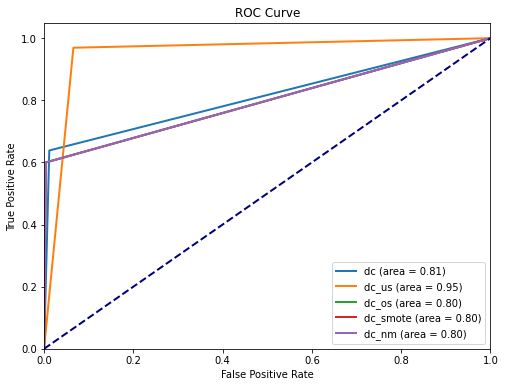

In [76]:
# Test models
classdict = {'normal':0, 'fraudulent':1}
print()
print('========================== Model Test Results ========================' "\n")   
modlist = [('dc', decision_tree_model),
           ('dc_us', decision_tree_model_undersample),
           ('dc_os', decision_tree_model_over_sample),
           ('dc_smote', decision_tree_model_smote),
           ('dc_nm', decision_tree_model_nm)
           
          ] 
models = [j for j in modlist]
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(df_Test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(df_Test))
    classification = metrics.classification_report(Y_test, v.predict(df_Test))   
    print('=== {} ==='.format(i))
    print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
    print()
    print("Recall:" "\n", confusion_matrix[1][1]/130)
    print()
    #pf.plot_confusion_matrix(confusion_matrix, classes = list(classdict.keys()),title='Confusion Matrix Plot', cmap=plt.cm.summer)
    print() 
    print("Classification Report:" "\n", classification) 
    print() 

print('============================= ROC Curve ===============================' "\n")      
pf.plot_roc_auc(arg1=models, arg2=df_Test, arg3=Y_test)



### 4.5 Implementing the models
>4.5.1	Logistic Regression   
4.5.2	SVM    
4.5.3	XGBoost    
4.5.4	Random Forest   
4.5.5	Artificial Neural Network   
4.5.6   Penalized-SVM   


Penalize Algorithms (Cost-Sensitive Training)
The next tactic is to use penalized learning algorithms that increase the cost of classification mistakes on the minority class.

A popular algorithm for this technique is Penalized-SVM.

During training, we can use the argument class_weight=’balanced’ to penalize mistakes on the minority class by an amount proportional to how under-represented it is.

We also want to include the argument probability=True if we want to enable probability estimates for SVM algorithms.

Let’s train a model using Penalized-SVM on the original imbalanced dataset:

### 4.6 Taking into consideration all samples that were considered fraud by any of the model

In [223]:
# method to combine all the fraud samples
modlist = [('dc      ', decision_tree_model),
           ('dc_us   ', decision_tree_model_undersample),
           ('dc_os   ', decision_tree_model_over_sample),
           ('dc_smote', decision_tree_model_smote),
           ('dc_nm   ', decision_tree_model_nm)]
res_recall = {}
res = pd.DataFrame()
for i,v in modlist:
    pred = v.predict(df_Test)
    y_df = pd.DataFrame(pred)
    res = pd.concat([res,y_df],axis = 1)
    #recall
    prfs = precision_recall_fscore_support(Y_test,pred , average=None)
    res_recall[i] = round(prfs[1][1],2)

# column total has value 1 if any of the models has predicted a fraud
res.loc[:,'total'] = res.max(axis = 1)  
res = res['total']
report = classification_report(Y_test,res)
print(classification_report(Y_test,res))

prfs = precision_recall_fscore_support(Y_test,res , average=None)
res_recall['Combined'] = round(prfs[1][1],2)
print('\033[1m', " Recall of combined results is :" ,round(prfs[1][1],4) )

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     27656
           1       0.06      0.98      0.11       130

    accuracy                           0.92     27786
   macro avg       0.53      0.95      0.53     27786
weighted avg       1.00      0.92      0.96     27786

  Recall of combined results is : 0.9846


In [227]:
# report generation of recall of all models
print("Model" , "           Recall")
for i,v in res_recall.items():
    print( i ,"\t",v)

Model            Recall
dc       	 0.64
dc_us    	 0.97
dc_os    	 0.6
dc_smote 	 0.6
dc_nm    	 0.6
Combined 	 0.98


In [195]:
# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
# svc_model = SVC(class_weight='balanced', probability=True)
# svc_model.fit(df_Train,Y_train)
# svc_predict = svc_model.predict(df_Test)
# print_eval(svc_predict,decision_tree_model_nm)

   
### 5.  Considering the Fraud cases as anamoly and use anamoly detection methods such as:   
> 5.1 Simple Statistical Methods : Metrics such as distribution, including mean, median, mode, and quantiles could be used to identify outliers since the definition of an anomalous data point is one that deviates by a certain standard deviation from the mean. 
       5.2 Density-Based Anomaly Detection : These include the k-nearest neighbors algorithm, Relative density of data based method known as local outlier factor (LOF) algorithm    
       5.3 Clustering-Based Anomaly Detection : K-means algorithm  
       5.4 Support Vector Machine-Based Anomaly Detection      
       5.5 Isolation Forest : https://www.youtube.com/watch?v=TP3wdwD8JVY    
       5.6 Using Auto Encoders : https://www.youtube.com/watch?v=S31E-ftRfQI
   


#### 5.1 Simple Statistical Methods: Z-score

In [ ]:
# upper and lower limit calculation with z score method and handling out liers
#data = pd.read_csv('machine_0.csv',index_col=0)
def handle_outlier(data):
"""The function takes the data and replaces all the outlier values o f all columns
with '0000000001' """
data_outlier_handled = data.copy() 
column_names = data.columns 
total_outliers = []
for col in column_names:
t=0
upper_boundary = data_outlier_handled[col].mean() + 3 * data_out lier_handled[col].std()
lower_boundary = data_outlier_handled[col].mean() - 3 * data_out lier_handled[col].std()
data_outlier_handled.loc[data_outlier_handled[col] > upper_bound ary,col] = 0.0000000001
data_outlier_handled.loc[data_outlier_handled[col] < lower_bound ary,col] = 0.0000000001
tu = data[data[col] > upper_boundary].count()[1] tl = data[data[col] < lower_boundary].count()[1]
#total_outliers.append(round((tu+tl)/len(data),2)) #to calculate the percent of outliers handled
#print(total_outliers) #to print the percent of outliers handled
return data_outlier_handled

 We will deal with anomaly detection in a separate notebook